# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

### **Semanas 3 y 4**
## **Importancia de Factores**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
X, y, cs = make_regression(n_samples=1000,  # Se generan "n" registros 
                       n_features=12,       # Cantidad de variables generar (factores o variables no necesariamente independientes entre ellas).
                       n_informative=6,     # Cantidad de factores independientes que generarán el modelo lineal de salida.
                       n_targets=1,         # Cantidad de variables dependientes de salida.
                       bias=0.,             # Valor constante del modelo lineal.
                       noise=1,             # Desviación estándar del ruido gaussiano aplicado a los datos.
                       coef=True,           # Para obtener los coeficientes del modelo usado para generar los datos.
                       random_state=7       # semilla
                      )

In [8]:
print('Información de los datos generados:')
print('Datos de entrada X:', X.shape)
print('Variable de salida y:', y.shape)
print('Coeficientes del modelo generado:\n', cs)

Información de los datos generados:
Datos de entrada X: (1000, 12)
Variable de salida y: (1000,)
Coeficientes del modelo generado:
 [ 0.         56.00888795  0.          0.          0.          0.
 77.46180405  0.          9.95495581 98.65680847 82.0223797  28.17147424]


In [4]:
X_train, Xvt, y_train, yvt = train_test_split(X, y, train_size=0.60, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

In [6]:
modelo = LinearRegression()

modelo.fit(X_train, y_train)

print('valor de R2-Train:', modelo.score(X_train, y_train))
print('valor de R2-Validation:', modelo.score(X_val, y_val))

valor de R2-Train: 0.9999639219882277
valor de R2-Validation: 0.9999576382208616


In [7]:
print('Diferencia entre los coeficientes reales y predichos:', (np.abs(modelo.coef_ - cs).sum()))

Diferencia entre los coeficientes reales y predichos: 0.500218652459822


Bastante aceptable la aproximación, es decir, generamos un modelo completamente lineal y este modelo lineal encontrado lo explica al 99.99% :)

# **Importancia de los Factores del modelo de regresión lineal en base a la magnitud de sus Coeficientes**

Lo que queremos es identificar las variables o factores de mayor importancia o impacto en el comportamiento de la variable de salida "y".

Ya comentamos en un ejercicio previo que una manera de medir la importancia de cada factor es con la magnitud de su coeficiente... y vemos que precisamente los coeficiente con un valor relativamente diferente de 0, coinciden con las variables independientes que se generaron al inicio. 

Sin embargo, volvemos a recordar que este método no es en general del todo válido, sobre todo cuando pueda haber también algunas relaciones no lineales entre algunos factores. Pero como hemos comentado, como una primera aproximación y habiendo escalado todos los factores al inicio, esta técnica podría empezar a darnos una buena idea muy rápido de cómo está participando cada factor en las predicciones del problema.

In [9]:
importance = modelo.coef_

for i,v in enumerate(importance):
 print('Factor: %0d, Coef-modelo: %.5f, Coef-verdadero: %s' % (i,v,cs[i]>0.))

Factor: 0, Coef-modelo: 0.04036, Coef-verdadero: False
Factor: 1, Coef-modelo: 56.00357, Coef-verdadero: True
Factor: 2, Coef-modelo: 0.07124, Coef-verdadero: False
Factor: 3, Coef-modelo: 0.04569, Coef-verdadero: False
Factor: 4, Coef-modelo: 0.07386, Coef-verdadero: False
Factor: 5, Coef-modelo: 0.04766, Coef-verdadero: False
Factor: 6, Coef-modelo: 77.41312, Coef-verdadero: True
Factor: 7, Coef-modelo: 0.01841, Coef-verdadero: False
Factor: 8, Coef-modelo: 9.85973, Coef-verdadero: True
Factor: 9, Coef-modelo: 98.70371, Coef-verdadero: True
Factor: 10, Coef-modelo: 82.01802, Coef-verdadero: True
Factor: 11, Coef-modelo: 28.16895, Coef-verdadero: True


Podemos visualizarlos de manera gráfica, para identificarlos mejor, sobre todo cuando son muchos:

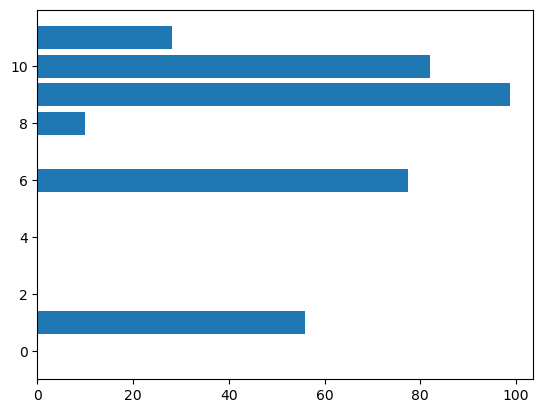

In [10]:
plt.barh([pd.DataFrame(X_train).columns[x] for x in range(len(importance))], importance)
plt.show()

Identifica muy bien los 6 factores independientes y podríamos resaltar los factores 6, 9 y 10 como los que están en principio explicando mejor la variabilidad de la salida "y". 

# **Importancia de los Factores del modelo de regresión lineal en base a la técnica llamada Importancia de Permutaciones (Permutation Importance)**

Este método funciona como sigue: una vez obtenido el modelo de regresión buscado, se calcula algún tipo de error en el cunjunto de entrenamiento o de validación. Generalmente conviene usar el conjunto de validación, para tener una mejor idea de cómo generalizará el modelo en sus predicciones.

En cuanto al error a calcular, para el caso de un modelo de regresión lineal podría ser $R^2$, MSE, RMSE, MAE, MAPE, etc. Y en un problema de clasificación se podría usar la exactitud (accuracy), la precisión (precision), la exhaustividad (recall), f1-score, etc. La elección del error estará también asociada a qué se quiere dar mayor importancia en las inferencias, en dado caso.

A continuación, se elige una columna (variable independiente o factor) al azar y se revuelven aleatoriamente todos sus elementos (matemáticamente a esta acción de revolverlos o intercambiarlos de lugar sin quitar o agregar elementos nuevos se le llama Permutación). Una vez revueltos se vuelve a calcular el error elegido y se mide qué tanto se afectó el desempeño del modelo, con respecto al calculado con todos los factores en orden. Mientras mayor sea el cambio de dicho error, mayor "importancia" o "calificación" se le asigna a dicho factor. Menor menor sea el impacto o afectación en el error inicial, menor la "importancia" de ese factor.

Este proceso se repite varias veces, promediando y ponderando el impacto que cada factor tuvo en el total de permutaciones realizadas.

Como podemos inferir de esta técnica, nos da una idea más robusta de la participación de cada variable, aunque nuevamente podrían existir dependencias entre algunos factores que no refleje exactamente la imprtancia asignada.

Por otro lado, esta técnica puede aplicarse a cualquier modelo lineal o no lineal, como las redes neuronales que estudiaremos más adelante. Por lo que para un mismo problema se podría aplicar el mismo proceso con diferentes modelos y observar las coincidencias o diferencias entre los diferentes factores y sus impactos.

In [12]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.075987,0.421996,2.123474,-0.261173,1.478673,-1.003978,-0.372826,0.160238,-1.329782,-0.616925,-2.269504,2.097126
1,-0.692416,-1.159568,0.431215,-0.564726,-0.893833,-1.593590,-0.492133,1.267810,0.177172,-0.027371,0.737565,-1.038402
2,-0.299828,0.300114,-1.137137,0.593128,-0.573274,0.475460,-0.443644,-0.316865,-0.172183,0.788505,-0.361668,0.810768
3,-0.453332,-0.801854,-1.323850,0.687394,-0.206466,0.683647,-0.079398,0.733162,0.808715,0.737808,-0.665344,2.357206
4,0.463156,0.132676,-0.939153,0.079820,-0.858953,-2.101339,-0.225635,-0.154308,-0.501418,-0.294588,-0.644191,0.791908
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.972737,-1.250412,-0.333982,-0.181690,0.134652,0.948211,-0.611231,-1.480404,-0.053254,-1.834470,-1.159282,-0.985846
596,0.496125,-1.077985,-1.951978,-0.711053,-1.121962,-0.530854,0.088155,0.373331,-1.336521,0.209722,-0.520972,-1.832426
597,-2.312774,-1.182564,0.515740,0.755812,-1.191139,0.865565,0.826329,0.345456,-1.494837,-0.270035,-0.843163,0.103693
598,-0.386272,0.610834,0.110579,-2.156091,1.482407,0.330836,0.528477,0.368360,0.036465,-0.621144,-0.806215,-0.377902


In [13]:
from sklearn.inspection import permutation_importance

In [14]:

resultados = permutation_importance(modelo, X_val, y_val, scoring='neg_mean_squared_error')

importance = resultados.importances_mean

for i,v in enumerate(importance):
 print('Factor: %0d, Coef-modelo: %.5f, Coef-verdadero: %s' % (i,v,cs[i]>0.))

Factor: 0, Coef-modelo: 0.00290, Coef-verdadero: False
Factor: 1, Coef-modelo: 5598.97582, Coef-verdadero: True
Factor: 2, Coef-modelo: 0.00859, Coef-verdadero: False
Factor: 3, Coef-modelo: 0.00356, Coef-verdadero: False
Factor: 4, Coef-modelo: -0.00174, Coef-verdadero: False
Factor: 5, Coef-modelo: 0.00522, Coef-verdadero: False
Factor: 6, Coef-modelo: 11351.12825, Coef-verdadero: True
Factor: 7, Coef-modelo: 0.00055, Coef-verdadero: False
Factor: 8, Coef-modelo: 188.05340, Coef-verdadero: True
Factor: 9, Coef-modelo: 17630.66979, Coef-verdadero: True
Factor: 10, Coef-modelo: 12394.79445, Coef-verdadero: True
Factor: 11, Coef-modelo: 1477.17860, Coef-verdadero: True


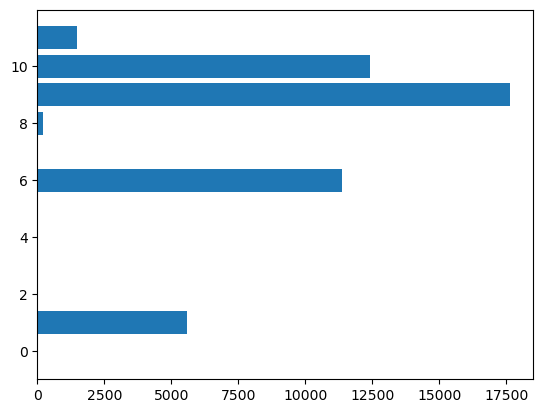

In [15]:
plt.barh([pd.DataFrame(X_train).columns[x] for x in range(len(importance))], importance)
plt.show()

Observa que la magnitud del impacto ahora se reslata más en las 3 o 4 de mayor magnitud y en este caso los factores 8 y 11, disminuyen bastante la calificación de su influencia en la variable de salida.

# Select Factors from Model

In [16]:
from sklearn.feature_selection import SelectFromModel

In [22]:
max_f = 3

# Indicamos el modelo que se usará para evaluar la importancia de los factores
# y la cantidad de ellos que se desean extraer:
fs = SelectFromModel(estimator=LinearRegression(), max_features=max_f)
# ajustamos con  los datos de entrenamiento para determinar cuáles se consideran los más relevantes:
fs.fit(X_train, np.ravel(y_train))
# y ahora obtenemos los factores
factor_select = fs.get_support()   

In [23]:
Xtrain_fs = pd.DataFrame(X_train)[pd.DataFrame(X_train).columns[factor_select]]
Xval_fs = pd.DataFrame(X_val)[pd.DataFrame(X_val).columns[factor_select]]
Xtest_fs = pd.DataFrame(X_test)[pd.DataFrame(X_test).columns[factor_select]]

In [24]:
Xtrain_fs.head()

,6,9,10
0,-0.372826,-0.616925,-2.269504
1,-0.492133,-0.027371,0.737565
2,-0.443644,0.788505,-0.361668
3,-0.079398,0.737808,-0.665344
4,-0.225635,-0.294588,-0.644191


In [25]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.075987,0.421996,2.123474,-0.261173,1.478673,-1.003978,-0.372826,0.160238,-1.329782,-0.616925,-2.269504,2.097126
1,-0.692416,-1.159568,0.431215,-0.564726,-0.893833,-1.593590,-0.492133,1.267810,0.177172,-0.027371,0.737565,-1.038402
2,-0.299828,0.300114,-1.137137,0.593128,-0.573274,0.475460,-0.443644,-0.316865,-0.172183,0.788505,-0.361668,0.810768
3,-0.453332,-0.801854,-1.323850,0.687394,-0.206466,0.683647,-0.079398,0.733162,0.808715,0.737808,-0.665344,2.357206
4,0.463156,0.132676,-0.939153,0.079820,-0.858953,-2.101339,-0.225635,-0.154308,-0.501418,-0.294588,-0.644191,0.791908


In [26]:
model = LinearRegression()
model.fit(Xtrain_fs, pd.DataFrame(y_train))

# evaluate the model
#ytrainhat = model.predict(Xtrain_fs)
#yvalhat = model.predict(Xval_fs)
#ytesthat = model.predict(Xtest_fs)

# evaluate predictions
R2train = model.score(Xtrain_fs, y_train)
R2val = model.score(Xval_fs, y_val)
R2test = model.score(Xtest_fs, y_test)

print('R2-Train: %.2f' % (R2train*100))
print('R2-Val: %.2f' % (R2val*100))
print('R2-Test: %.2f' % (R2test*100))


R2-Train: 85.50
R2-Val: 84.92
R2-Test: 85.16


Bastante bien, con 4 factores se obtiene un 96.6% aprox del $R^2$ y usando solo los 3 factores de mayor impacto obtenemos un 85%, aprox.

# Correlaciones

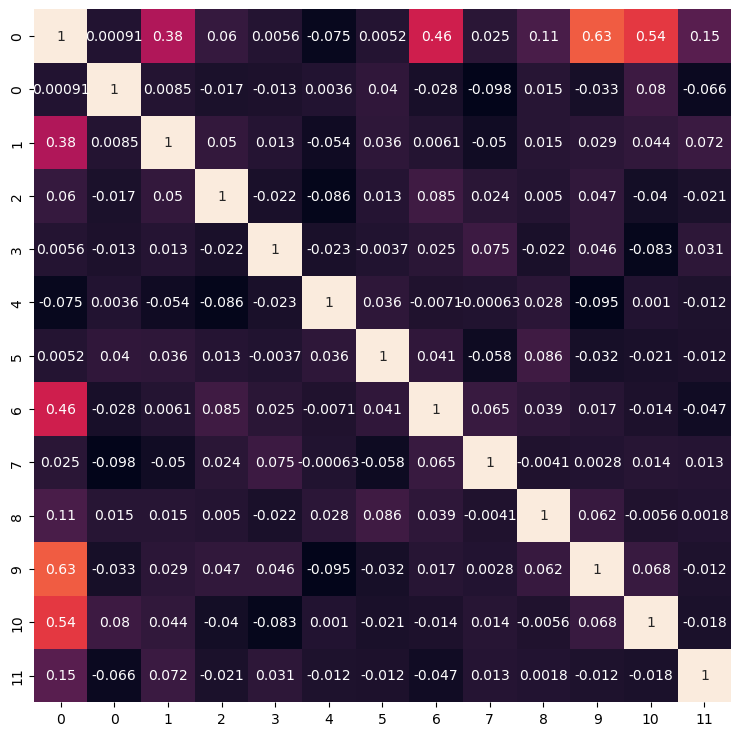

In [27]:
correlations = pd.concat([pd.DataFrame(y_train), pd.DataFrame(X_train)], axis=1).corr(numeric_only=True)
f, ax = plt.subplots(figsize = (9,9))
sns.heatmap(correlations, annot=True, cbar=False);

Observa que las de mayor correlación con la variable de salida son nuevamente los mismos factores y con el mismo orden de importancia.

# Importancia de los factores mediante el Factor de Inflación de la Varianza

# VIF (Variance Inflation Factor) o el problema de la multicolinealidad

La multicolinealidad es un problema en modelos como la regresión lineal, el hace que los coeficientes obtenidos se comporten de manera inestable, lo cual se refleja en coeficientes de magnitud muy grande (aún cuando se hayan escalado los factores de entrada). 

De manera simple, podemos decir que la multicolinealidad refleja la dependencia que puedan tener entre sí algunas de las variables independientes de un problema, afectando en la interpretación y efecto que pueda tener cada una de manera individual en la variable de salida.

Matemáticamente se define el Factor de Inflación de la Varianza, VIF, para cada varaible o factor $k$ de la manera siguiente:

###     $VIF_k = \frac{1}{1-R^2_k}$

donde $R^2_k$ es el coeficiente de correlación del factor $k$ con respecto al resto de las demás variables independientes.

Recordemos que mientras mayor sea la relación lineal de una variable de salida con respecto a sus variables de entrada, más cercano el valor de $R^2$ a 1. Y mientras menos exista esta dependencia lineal, más cercano a 0. De aquí que, de manera general, podamos decir que cuando el valor de $VIF_k$ "crezca mucho" en alguno de los factores $k$, entonces dicho factor $k$ tiene una dependencia muy alta con respecto a uno o más del resto de los factores. Y esto puede utilizarse en ocasiones para eliminir dicho factor del modelo. 

Decir que el valor de $VIF_k$ es muy grande para algún factor es relativo y depende en general del problema en cuestión, sin embargo es común utilizar dicho umbral como mayor a 10 unidades. Sin embargo varios autores también consideran el valor de 5 como dicho umbral. Nosotros en el curso usaremos el valor de 10, salvo que se diga lo contrario.

La diferencia de usar por ejemplo la matriz de correlación para identificar la dependencia entre variables independientes, es que esta relaciones son por parejas solamente y el índice $VIF$ puede encintrar dependencias con grupos de más de 2 variables independientes.

En resumen, la manera de proceder para la detección de la multicolinealidad es calcular dicho índice para todos los factores de entrada y eliminar el de mayor magnitud arriba de 10, en caso de existir. Posteriormente se vuelve a calcular dicho índice para todos los factores restantes y nuevamente se eimina el de mayor magnitud arriba de 10. Y así se procede hasta que todos los índices $VIF$ de los factores que quedan sean menores a 10.

Existen varias librerías que calculan dicho índice $VIF$, nosotros nos apoyaremos en la librería "statsmodels", cuyo método variance_inflation_factor$(X,k)$ nos devuelve el índice $VIF_k$ del factor $k$ con respecto al resto de los factores de un conjunto de factores de entrada $X$. 

### Por cierto, toma en cuenta que esta técnica aplica solamente a factores de tipo numérico.

Puedes consultar más al respecto en la documentación correspondiente:

https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

Veámoslo con el mismo ejemplo que teníamos previamente, en el cual se generó un modelo lineal de 12 factores de entrada, de los solo la mitad, 6, son los independientes.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
# Definamos una función para estar evaluando el índice VIF:


def indice_vif(X):
    
    X = pd.DataFrame(X)  # nos aseguramos que las variable de entrada están en un DataFrame de Pandas.
    vif = pd.DataFrame()   # inicializamos el DataFRame de vif
    vif["factores"] = X.columns   # recuperamos todos los factores de nuestro conjunto de entrada
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # FOR sobre las columnas/factores de X.

    return(vif)

In [30]:
df = pd.DataFrame()

df['x1'] = [-3, 2, 3, 4, 5]
df['x2'] = [9, 4, 9, 16, 25]
df['x1+x2'] = [6.1, 4.2, 12.3, 19.8, 29.4]
df['otro'] =[1,1,0,1,1]

In [31]:
df

,x1,x2,x1+x2,otro
0,-3,9,6.1,1
1,2,4,4.2,1
2,3,9,12.3,0
3,4,16,19.8,1
4,5,25,29.4,1


In [32]:
indice_vif(df)

,factores,VIF
0,x1,62.158212
1,x2,1967.424262
2,x1+x2,2258.072377
3,otro,17.063729


In [33]:
X2 = df.drop(['x1+x2'],axis=1)

indice_vif(X2)

,factores,VIF
0,x1,2.739491
1,x2,6.558572
2,otro,3.677428
